In [1]:
import torch
import os
import numpy as np
import json
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
os.getcwd()

'c:\\Users\\yunjc\\python_jupyter\\bupyeonggu\\bp_road_crack_detection'

In [3]:
data_path = "D:/data/도로장애물·표면 인지 영상(수도권)/Validation/CRACK/"
annot_path = data_path+"annotation/C_Frontback_B01/"
image_path = data_path+"images/C_Frontback_B01/"

images = os.listdir(image_path)
labels = os.listdir(annot_path)

im_idx = 500

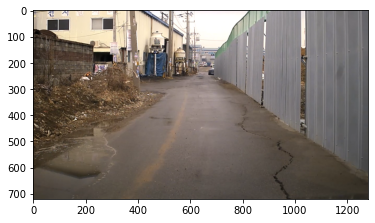

(720, 1280, 3)


In [4]:
img = np.array(Image.open(image_path+"/"+images[im_idx]).convert("RGB"))
plt.imshow(img,cmap="gray")
plt.show()
print(img.shape)

In [5]:
print(images[im_idx])
print(images[im_idx].replace(".png","_PLINE.json"))

V2F_HY_0108_20210115_143623_N_CH1_Seoul_Sun_Frontback_Day_71675.png
V2F_HY_0108_20210115_143623_N_CH1_Seoul_Sun_Frontback_Day_71675_PLINE.json


In [6]:
with open(annot_path+"/"+images[im_idx].replace(".png","_PLINE.json"), "r", encoding="utf8") as f:
        contents = f.read()  # string 타입 json_data = json.loads(contents)
        json_data = json.loads(contents)
    
json_data

{'info': {'description': 'V2F_HY_0108_20210115_143623_N_CH1_Seoul_Sun_Frontback_Day_71675_PLINE JSON file',
  'url': '',
  'version': '1.0',
  'year': 2021,
  'contributor': 'Konkuk_university',
  'date_created': '2021/05/12'},
 'images': {'file_name': 'V2F_HY_0108_20210115_143623_N_CH1_Seoul_Sun_Frontback_Day_71675.png',
  'height': 720,
  'width': 1280,
  'id': 1},
 'annotations': [{'segmentation': [],
   'polyline': [[1277.190082644628,
     497.02479338842977,
     1239.3388429752067,
     497.1900826446281,
     1206.1157024793388,
     497.02479338842977,
     1132.396694214876,
     494.04958677685954,
     1107.107438016529,
     494.7107438016529,
     1005.6198347107438,
     492.2314049586778,
     941.818181818182,
     492.72727272727275,
     904.4628099173552,
     487.7685950413223,
     836.0330578512397,
     488.4297520661157,
     820,
     485.4545454545455,
     786.6115702479339,
     487.107438016529,
     762.3140495867768,
     490.74380165289256,
     693.057

(720, 1280, 3)


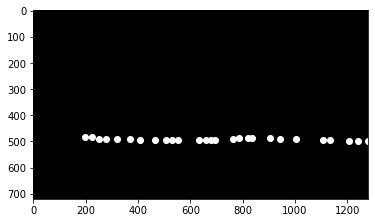

In [7]:
lbl = np.array([[[1]*3]*1280]*720)
# lbl[json_data["polyline"]] = 0
plt.imshow(lbl,cmap="gray")
temp = np.array(json_data["annotations"][0]["polyline"]).reshape(-1)
plt.scatter(temp[[i for i in range(len(temp)) if i%2==0]], temp[[j for j in range(len(temp)) if j%2!=0]],
            color="white")
print(lbl.shape)

[1277.19008264  497.02479339 1239.33884298  497.19008264 1206.11570248
  497.02479339 1132.39669421  494.04958678 1107.10743802  494.7107438
 1005.61983471  492.23140496  941.81818182  492.72727273  904.46280992
  487.76859504  836.03305785  488.42975207  820.          485.45454545
  786.61157025  487.10743802  762.31404959  490.74380165  693.05785124
  493.2231405   678.18181818  494.38016529  658.01652893  496.19834711
  633.2231405   494.54545455  554.21487603  493.2231405   531.40495868
  494.54545455  506.7768595   495.37190083  465.2892562   495.04132231
  408.92561983  494.38016529  369.91735537  492.56198347  318.34710744
  492.72727273  276.85950413  491.90082645  248.76033058  489.4214876
  223.14049587  483.96694215  196.52892562  481.65289256]


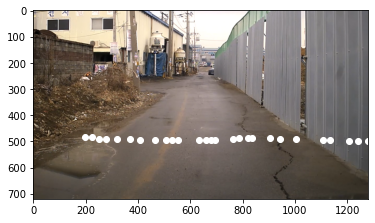

In [8]:
img = np.array(Image.open(image_path+"/"+images[im_idx]).convert("RGB"))
plt.imshow(img,cmap="gray")

# lbl = np.array([[[1]*3]*1280]*720)
# lbl[json_data["polyline"]] = 0
# plt.imshow(lbl,cmap="gray")
temp = np.array(json_data["annotations"][0]["polyline"]).reshape(-1)
print(temp)
plt.scatter(temp[[i for i in range(len(temp)) if i%2==0]], temp[[j for j in range(len(temp)) if j%2!=0]],
            color="white")

plt.show()

In [64]:
json_data["annotations"][0]

{'segmentation': [],
 'polyline': [[1277.190082644628,
   497.02479338842977,
   1239.3388429752067,
   497.1900826446281,
   1206.1157024793388,
   497.02479338842977,
   1132.396694214876,
   494.04958677685954,
   1107.107438016529,
   494.7107438016529,
   1005.6198347107438,
   492.2314049586778,
   941.818181818182,
   492.72727272727275,
   904.4628099173552,
   487.7685950413223,
   836.0330578512397,
   488.4297520661157,
   820,
   485.4545454545455,
   786.6115702479339,
   487.107438016529,
   762.3140495867768,
   490.74380165289256,
   693.0578512396694,
   493.22314049586777,
   678.1818181818182,
   494.38016528925624,
   658.0165289256198,
   496.19834710743805,
   633.2231404958678,
   494.54545454545456,
   554.2148760330579,
   493.22314049586777,
   531.404958677686,
   494.54545454545456,
   506.77685950413223,
   495.3719008264463,
   465.2892561983471,
   495.0413223140496,
   408.92561983471074,
   494.38016528925624,
   369.9173553719008,
   492.5619834710744,

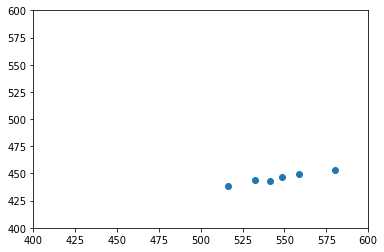

In [48]:
temp = np.array(json_data["annotations"][1]["polyline"]).reshape(-1)
plt.scatter(temp[[i for i in range(len(temp)) if i%2==0]], temp[[j for j in range(len(temp)) if j%2!=0]],
            )
plt.xlim(400,600)
plt.ylim(400,600)
plt.show()

In [42]:
# temp[[i for i in len(temp) if i%2==0]]
[i for i in range(len(temp)) if i%2==0]

[0, 2, 4, 6, 8, 10]

In [21]:
print(lbl)

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]
